# El papel de los momios en la regresión logística

## Recordando la regresión lineal

El modelo de regresión lineal puede funcionar bien para problemas de regresión, pero falla en tareas de clasificación.

Dado que el resultado predicho no es una probabilidad, sino una interpolación lineal entre puntos, no existe un umbral significativo que permita distinguir una clase de otra.

$$
\hat{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n
$$


| Observación | $ x_1 $ | $ x_2 $ | $ \dots $ | $ x_n $ | $ y $ |
|-------------|----------|----------|-------------|-----------|--------|
| 1           | 2.0      | 1.0      | $ \dots $ | 0.0       | 1.75      |
| 2           | 1.5      | 0.5      | $ \dots $ | 1.0       | 1.6      |
| 3           | 3.0      | 2.0      | $ \dots $ | 1.0       | 1.8      |
| 4           | 0.5      | 1.0      | $ \dots $ | 0.5       | 1.54      |

En este ejemplo, el modelo trataría de ajustar los coeficientes $ \beta_0, \beta_1, \dots, \beta_n $ para que $ \hat{y} $ se aproxime lo más posible a los valores reales de $ y $.



## ¿Qué son los momios?

Son simplemente otra manera de expresar la probabilidad de que ocurra un evento.

Usamos una razón entre la posibilidad de que suceda y que no suceda.

Matemáticamente, los momios se definen como:

$$
\begin{aligned}
\text{momios} &= \frac{P(\text{evento ocurre})}{P(\text{evento no ocurre})} \\
              &= \frac{p}{1 - p}
\end{aligned}
$$

Por ejemplo, en un partido PSG vs Real Madrid, si la probabilidad de que el Real Madrid gane es 0.25 (25%), los momios son

$$
\frac{0.25}{1 - 0.25} = \frac{0.25}{0.75} = \frac{1}{3} \approx 0.33
$$

Así, los momios nos ayudan a entender la "ventaja" o "desventaja" en términos relativos entre ganar o no ganar.


## Regresión logística...

El paso de la regresión lineal a la regresión logística es directo.  

Para clasificación, preferimos probabilidades entre 0 y 1, por lo que aplicamos la función logística al lado derecho de la ecuación. Esto fuerza la salida a tomar únicamente valores entre 0 y 1:

$$
\mathbb{P}(Y = 1) = \text{logistic}( \boldsymbol{\beta} \mathbf{x}) = 
\frac{1}{1 + \exp\left( -(\beta_0 + \beta_1 x_1 + \dots + \beta_p x_n) \right)}
$$


Podremos ahora utilizar el valor 0.5 como umbral.

##  ... y su interpretación

Los pesos, a diferencia de la regresión lineal, ya no influyen linealmente en la probabilidad.  
Para interpretar reformulemos:

$$
\ln\left( \frac{\mathbb{P}(Y = 1)}{1 - \mathbb{P}(Y = 1)} \right) = \ln\left( \frac{\mathbb{P}(Y = 1)}{\mathbb{P}(Y = 0)} \right) = \beta_0 + \beta_1 x_1 + \dots + \beta_p x_p
$$

Al término dentro del logaritmo se le llama **momios** (probabilidad del evento dividida por la probabilidad del no-evento),  
y al envolverlo en el logaritmo, se le llama **log-momios**.

Esta fórmula muestra que el modelo de regresión logística es un modelo lineal, pero para los log-momios. 

Aparte, ya vemos que un aumento de una unidad en las características no incrementa la probabilidad en \( \beta_j \),  
sino que cambia los momios multiplicativamente.


Reacomodemos para ver cómo cambia la predicción cuando una de las características $ x_j $ se incrementa en 1 unidad.

$$
\frac{\mathbb{P}(Y = 1)}{1 - \mathbb{P}(Y = 1)} = \text{odds} = \exp\left( \beta_0 + \beta_1 x_1 + \dots + \beta_p x_p \right)
$$

Observemos el cociente entre dos predicciones:

$$
\frac{\text{odds}_{x_j + 1}}{\text{odds}_{x_j}} = 
\frac{\exp\left( \beta_0 + \beta_1 x_1 + \dots + \beta_j(x_j + 1) + \dots + \beta_p x_p \right)}
     {\exp\left( \beta_0 + \beta_1 x_1 + \dots + \beta_j x_j + \dots + \beta_p x_p \right)}
$$

Aplicamos la siguiente regla:

$$
\frac{\exp(a)}{\exp(b)} = \exp(a - b)
$$

Y eliminamos muchos términos comunes:

$$
\frac{\text{odds}_{x_j + 1}}{\text{odds}_{x_j}} = \exp\left( \beta_j(x_j + 1) - \beta_j x_j \right) = \exp(\beta_j)
$$


Es decir, un cambio de una unidad en una característica cambia la razón de momios (*odds ratio*) multiplicativamente por un factor de:

$$
\exp(\beta_j)
$$

También podemos interpretarlo de la siguiente manera: un cambio de una unidad en $ x_j $ incrementa los **log-momios** (log-odds) en el valor del peso correspondiente $ \beta_j $.


## Una implementación rápida usando scikit-learn

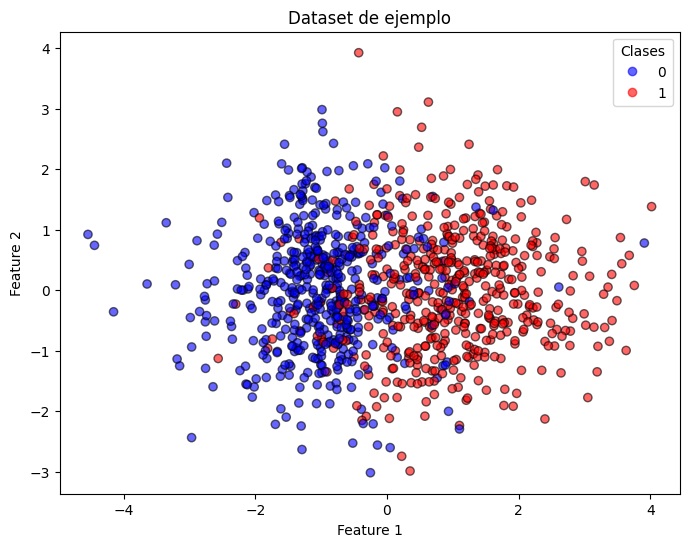

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generamos datos de ejemplo (2 clases, 3 features)
X, y = make_classification(
    n_samples=1000,
    n_features=3,
    n_informative=2,
    n_redundant=0,
    n_repeated=0,
    random_state=42
)

# Tomamos solo las primeras dos características para graficar
X_plot = X[:, :2]

# Graficamos con colores según la clase
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_plot[:, 0], X_plot[:, 1], c=y, cmap='bwr', alpha=0.6, edgecolor='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Dataset de ejemplo')
plt.legend(*scatter.legend_elements(), title="Clases")
plt.show()

In [14]:
# Dividimos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creamos el modelo de regresión logística
model = LogisticRegression()

# Entrenamos el modelo
model.fit(X_train, y_train)

# Y predecimos en el conjunto de prueba
y_pred = model.predict(X_test)

print(f"Precisión: {accuracy_score(y_test, y_pred):.2f}")

Precisión: 0.85


## Referencias

- https://christophm.github.io/interpretable-ml-book/logistic.html